In [1]:
import numpy as np
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
def get_sublist(subDir):
    """ Lists all directories in a main directories of all subjects to create a subject list. Note that this is BIDS format specific (assumes all subject directories begin "sub-xxx". Could be modified.
 Return: subject list """
    sublist = []
    for subnum in np.sort(os.listdir(subDir)): 
        if len(subnum) == 3: 
            if not 'html' in subnum: 
                sublist.append(subnum) 
    return sublist

In [3]:
dicomPath = '/Users/Eichenbaum/HWNI/Experiments/nScout/data/dicom/'
sublist = get_sublist(dicomPath)

# Determine which subjects and which runs exceed threshold for % of TR's where FD > 0.20mm

In [4]:
threshold = .5
for sub in sublist:
    for run in ['1', '2']:
    
        reg_data = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/fmriprep/sub-%s/func/sub-%s_task-rest_run-00%s_desc-confounds_regressors.tsv' %(sub,sub,run), sep = '\t')
        nVolsExceeded = np.shape(np.where(reg_data['framewise_displacement'][1:]>.2))[1]
        percExceeded = np.divide(nVolsExceeded,399)
        if percExceeded > threshold:
            print('Sub-%s_run-00%s = %s' %(sub,run, str(round(percExceeded,3))))
    
# groupFD = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/mriqc/group_bold.tsv', delimiter = '\t')
# idx50 = np.where(groupFD['fd_perc']>50)[0]
# idx60 = np.where(groupFD['fd_perc']>60)[0]

Sub-013_run-001 = 0.529
Sub-029_run-001 = 0.526
Sub-029_run-002 = 0.797
Sub-033_run-001 = 0.794
Sub-033_run-002 = 0.752
Sub-050_run-002 = 0.561
Sub-060_run-002 = 0.514


In [3]:
# groupFD['bids_name'][idx50]

22     sub-013_task-rest_run-001_bold
24     sub-014_task-rest_run-001_bold
52     sub-029_task-rest_run-001_bold
53     sub-029_task-rest_run-002_bold
60     sub-033_task-rest_run-001_bold
61     sub-033_task-rest_run-002_bold
95     sub-050_task-rest_run-002_bold
112    sub-060_task-rest_run-001_bold
113    sub-060_task-rest_run-002_bold
Name: bids_name, dtype: object

In [4]:
# groupFD['bids_name'][idx60]

22     sub-013_task-rest_run-001_bold
52     sub-029_task-rest_run-001_bold
53     sub-029_task-rest_run-002_bold
60     sub-033_task-rest_run-001_bold
61     sub-033_task-rest_run-002_bold
113    sub-060_task-rest_run-002_bold
Name: bids_name, dtype: object

# Correlate resting-state Modularity with task behavior metrics

In [4]:
behavDir = '/Users/Eichenbaum/HWNI/Experiments/nScout/data/behavior'

sRT67 = pd.read_excel('%s/Cal_data_output_n72_010820.xlsx' %(behavDir), sheet_name= [0], skiprows =[27,31])[0]
rRT67 = pd.read_excel('%s/Cal_data_output_n72_010820.xlsx' %(behavDir), sheet_name= [1], skiprows =[27,31])[1]
RA67 = pd.read_excel('%s/Cal_data_output_n72_010820.xlsx' %(behavDir), sheet_name= [2], skiprows =[27,31])[2]
pRT67 = pd.read_excel('%s/Cal_data_output_n72_010820.xlsx' %(behavDir), sheet_name= [3], skiprows =[27,31])[3]

sRTall = pd.read_excel('%s/Cal_data_output_n72_010820.xlsx' %(behavDir), sheet_name= [0])[0]
rRTall = pd.read_excel('%s/Cal_data_output_n72_010820.xlsx' %(behavDir), sheet_name= [1])[1]
RAall = pd.read_excel('%s/Cal_data_output_n72_010820.xlsx' %(behavDir), sheet_name= [2])[2]
pRTall = pd.read_excel('%s/Cal_data_output_n72_010820.xlsx' %(behavDir), sheet_name= [3])[3]

# sRT83 = pd.read_excel('%s/Cal_data_output_n88_030220.xlsx' %(behavDir), sheet_name= [0], skiprows =[27,31])[0]
# rRT83 = pd.read_excel('%s/Cal_data_output_n88_030220.xlsx' %(behavDir), sheet_name= [1], skiprows =[27,31])[1]
# RA83 = pd.read_excel('%s/Cal_data_output_n88_030220.xlsx' %(behavDir), sheet_name= [2], skiprows =[27,31])[2]
# pRT83 = pd.read_excel('%s/Cal_data_output_n88_030220.xlsx' %(behavDir), sheet_name= [3], skiprows =[27,31])[3]

sRT93 = pd.read_csv('%s/Cal_data_output_n93_032620_Simple-RT.csv' %(behavDir), index_col = 0,  skiprows =[27,31])
rRT93 = pd.read_csv('%s/Cal_data_output_n93_032620_rRT.csv' %(behavDir), index_col = 0,  skiprows =[27,31])
RA93 = pd.read_csv('%s/Cal_data_output_n93_032620_Rapid-Adjust.csv' %(behavDir), index_col = 0,  skiprows =[27,31])
pRT93 = pd.read_csv('%s/Cal_data_output_n93_032620_Paced-RT.csv' %(behavDir), index_col = 0, skiprows =[27,31])

# modVals = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_AllSubs_BCT-default.csv', delimiter = ',', header = None).values

# modValsNoThreshNegAsym = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_BCT-default_NegAsym_NOthresh.csv', delimiter = ',', header = None).values

# modValsYeo7Net = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_Yeo7NetPart_allPos.csv', delimiter = ',', header = None).values
modValsYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
modValsYeo7NetBrainnetome = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_Yeo7NetPart_allPos_brainnetome.csv', delimiter = ',', header = None).values


# modValsConsensus = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_ConsenPart_allPos.csv', delimiter = ',', header = None).values
modValsConsensusSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_ConsenPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
modValsConsensusBrainnetome = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_ConsenPart_allPos_brainnetome.csv', delimiter = ',', header = None).values


# modVals05 = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_BCT-default_thresh_05.csv', delimiter = ',', header = None).values
# modVals075 = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_BCT-default_thresh_075.csv', delimiter = ',', header = None).values
# modVals10 = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_BCT-default_thresh_1.csv', delimiter = ',', header = None).values
# modVals125 = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_BCT-default_thresh_125.csv', delimiter = ',', header = None).values
# modVals15 = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_BCT-default_thresh_15.csv', delimiter = ',', header = None).values

alert93 = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/behavior/qaire_altertness.txt')[:,1]

# Simple RT -- RT Mean

-0.013 0.903
-0.028 0.794


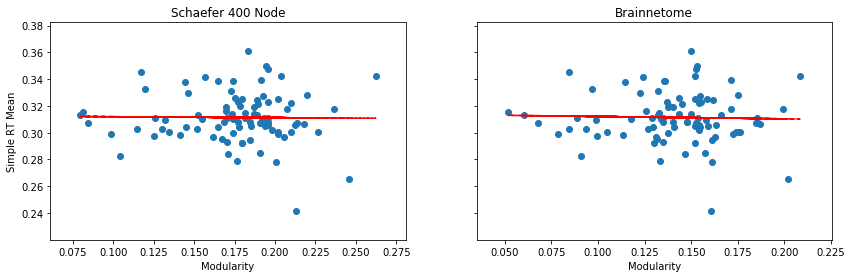

In [8]:
### Yeo 7 Network Modularity ###

dataX1 = modValsYeo7NetSchaefer[:,1] 
dataX2 = modValsYeo7NetBrainnetome[:,1] 
dataY = sRT93['sRT_corrected_mean']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Simple RT Mean')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

0.016 0.886
0.035 0.746


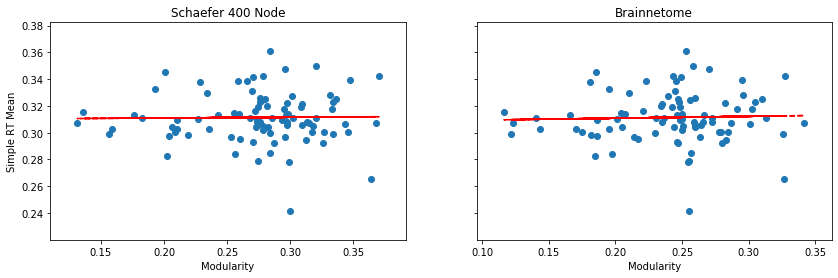

In [9]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = sRT93['sRT_corrected_mean']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Simple RT Mean')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

# Simple RT -- RT Std Dev

0.020455343404935624
0.058879571303581305


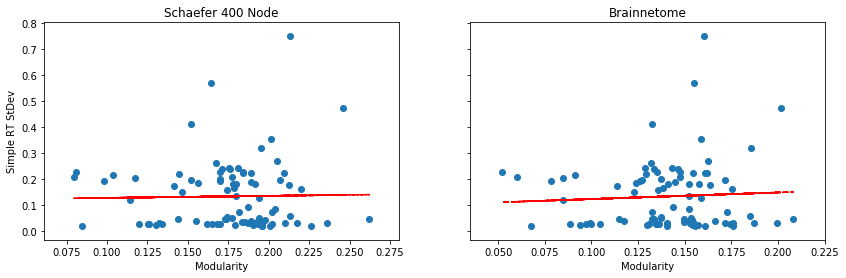

In [10]:
### Yeo 7 Network Modularity ###

dataX1 = modValsYeo7NetSchaefer[:,1] 
dataX2 = modValsYeo7NetBrainnetome[:,1] 
dataY = sRT93['sRT_std']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Simple RT StDev')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.corrcoef(dataX1, dataY)[0,1])
print(np.corrcoef(dataX2, dataY)[0,1])

-0.001557792011801704
0.05565827906459924


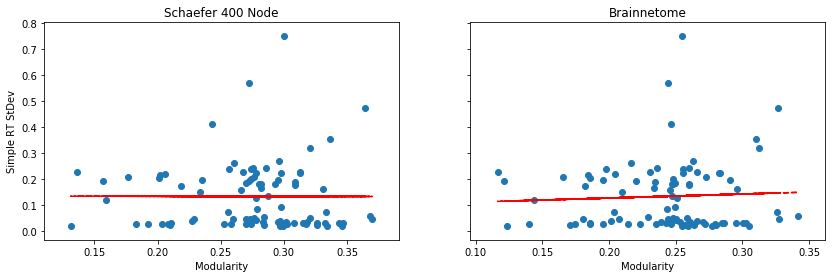

In [11]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = sRT93['sRT_std']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Simple RT StDev')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.corrcoef(dataX1, dataY)[0,1])
print(np.corrcoef(dataX2, dataY)[0,1])

# rRT -- RT Std Dev

-0.126 0.242
-0.107 0.322


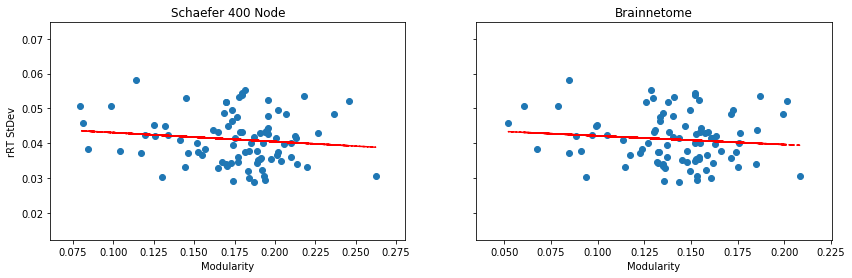

In [5]:
### Yeo 7 Network Modularity ###

dataX1 = modValsYeo7NetSchaefer[:,1] 
dataX2 = modValsYeo7NetBrainnetome[:,1] 
dataY = rRT93['rRT_std']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('rRT StDev')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

-0.151 0.159
-0.125 0.244


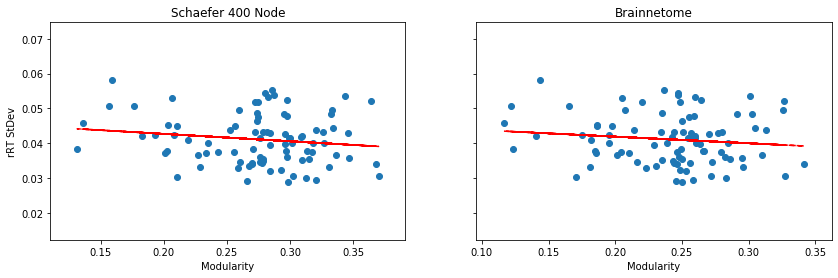

In [28]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = rRT93['rRT_std']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('rRT StDev')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')


z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

# rRT -- dPrime

-0.024 0.826
-0.062 0.564


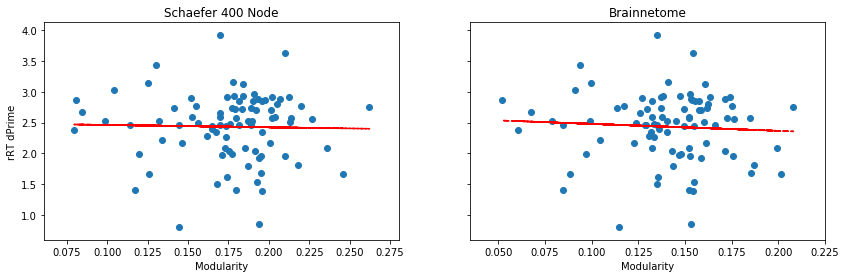

In [14]:
### Yeo 7 Network Modularity ###

dataX1 = modValsYeo7NetSchaefer[:,1] 
dataX2 = modValsYeo7NetBrainnetome[:,1] 
dataY = rRT93['rRT_dprime']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('rRT dPrime')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

-0.038 0.724
0.007 0.948


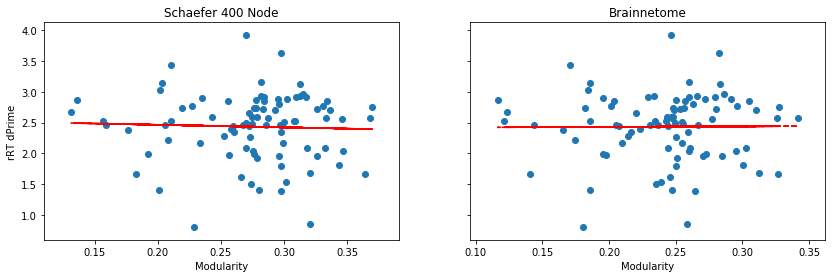

In [15]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = rRT93['rRT_dprime']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('rRT dPrime')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

# rRT -- Stop Rate

-0.096 0.372
-0.127 0.238


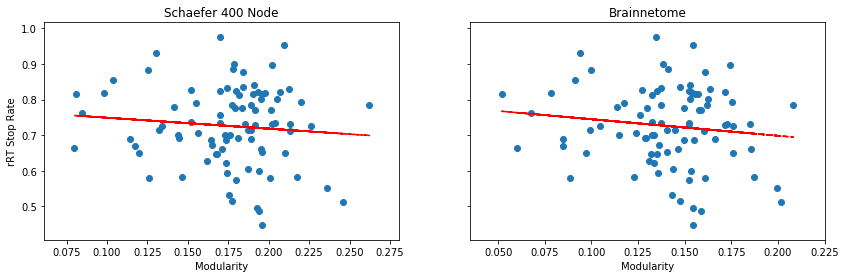

In [16]:
### Yeo 7 Network Modularity ###

dataX1 = modValsYeo7NetSchaefer[:,1] 
dataX2 = modValsYeo7NetBrainnetome[:,1] 
dataY = rRT93['rRT_stoprate']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('rRT Stop Rate')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

-0.069 0.524
-0.061 0.573


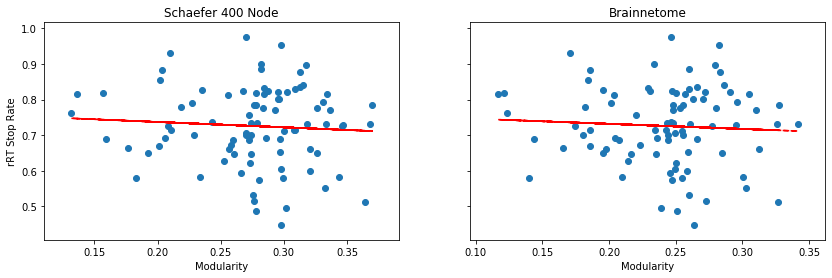

In [17]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = rRT93['rRT_stoprate']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('rRT Stop Rate')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

# Rapid Adjust -- PSE

0.091 0.399
0.078 0.471


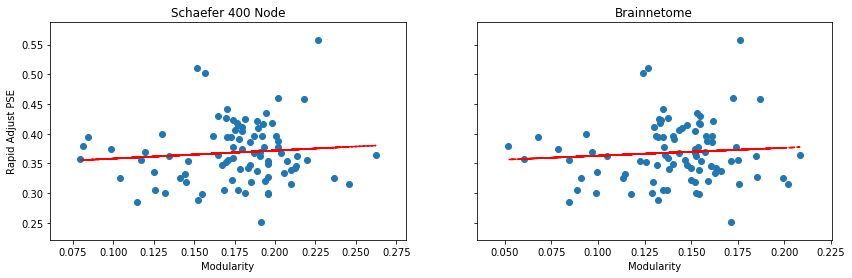

In [18]:
### Yeo 7 Network Modularity ###

dataX1 = modValsYeo7NetSchaefer[:,1] 
dataX2 = modValsYeo7NetBrainnetome[:,1] 
dataY = RA93['IC_PSE']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Rapid Adjust PSE')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

0.13 0.228
0.102 0.345


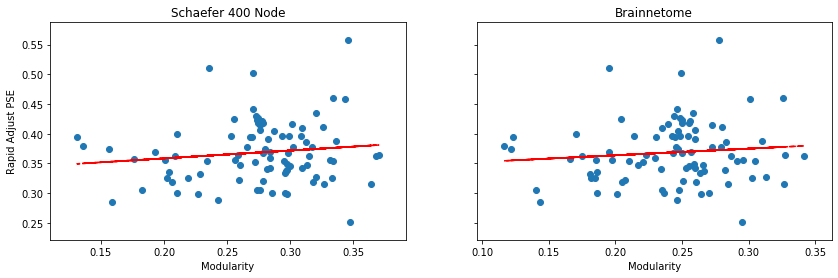

In [19]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = RA93['IC_PSE']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Rapid Adjust PSE')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

# Paced RT -- ACC Mean

0.251 0.019
0.21 0.05


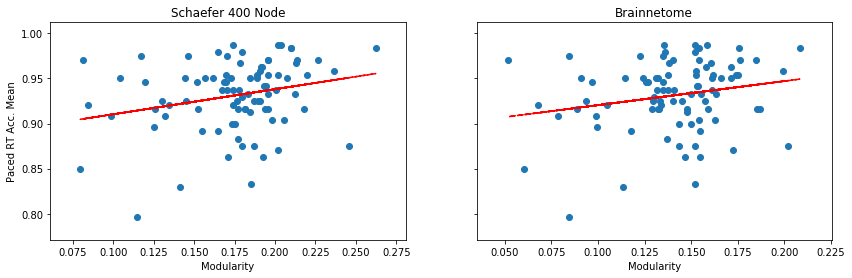

In [21]:
### Yeo 7 Network Modularity ###

dataX1 = modValsYeo7NetSchaefer[:,1] 
dataX2 = modValsYeo7NetBrainnetome[:,1] 
dataY = np.divide(pRT93['ACC_Bin1'] + pRT93['ACC_Bin2'] + pRT93['ACC_Bin3'] + pRT93['ACC_Bin4'],4)

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Paced RT Acc. Mean')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

0.238 0.026
0.264 0.013


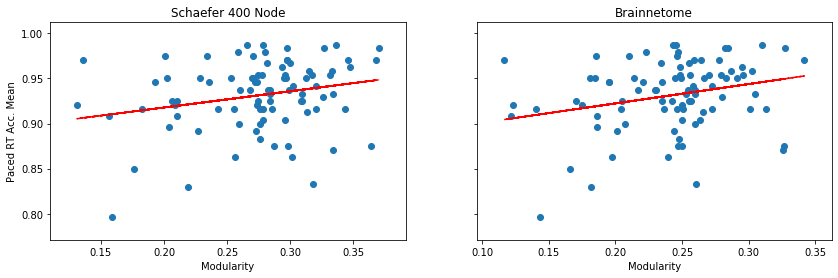

In [44]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = np.divide(pRT93['ACC_Bin1'] + pRT93['ACC_Bin2'] + pRT93['ACC_Bin3'] + pRT93['ACC_Bin4'],4)

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Paced RT Acc. Mean')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

-0.073 0.752
-0.018 0.937


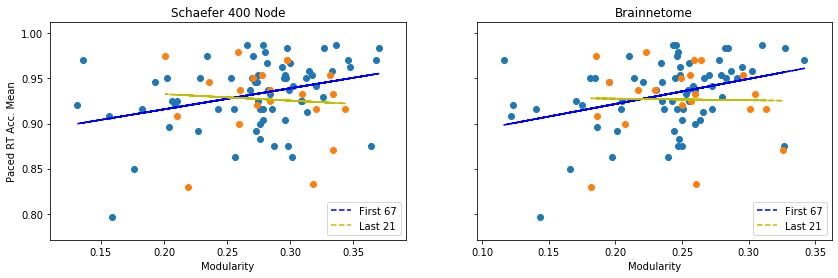

In [41]:
### Consensus Partition Modularity ###

dataX1_67 = modValsConsensusSchaefer[:67,1] 
dataX1_93 = modValsConsensusSchaefer[67:,1] 

dataX2_67 = modValsConsensusBrainnetome[:67,1] 
dataX2_93 = modValsConsensusBrainnetome[67:,1] 

dataY_67 = np.divide(pRT93['ACC_Bin1'][:67] + pRT93['ACC_Bin2'][:67] + pRT93['ACC_Bin3'][:67] + pRT93['ACC_Bin4'][:67],4)
dataY_93 = np.divide(pRT93['ACC_Bin1'][67:] + pRT93['ACC_Bin2'][67:] + pRT93['ACC_Bin3'][67:] + pRT93['ACC_Bin4'][67:],4)

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1_67, dataY_67)
ax1.scatter(dataX1_93, dataY_93)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Paced RT Acc. Mean')

ax2.scatter(dataX2_67, dataY_67)
ax2.scatter(dataX2_93, dataY_93)
ax2.set_xlabel('Modularity')


z1_67 = np.polyfit(dataX1_67, dataY_67, 1)
p1_67 = np.poly1d(z1_67)
ax1.plot(dataX1_67,p1_67(dataX1_67),"b--")

z1_93 = np.polyfit(dataX1_93, dataY_93, 1)
p1_93 = np.poly1d(z1_93)
ax1.plot(dataX1_93,p1_93(dataX1_93),"y--")

z2_67 = np.polyfit(dataX2_67, dataY_67, 1)
p2_67 = np.poly1d(z2_67)
ax2.plot(dataX2_67,p2_67(dataX2_67),"b--")

z2_93 = np.polyfit(dataX2_93, dataY_93, 1)
p2_93 = np.poly1d(z2_93)
ax2.plot(dataX2_93,p2_93(dataX2_93),"y--")

ax1.legend(['First 67', 'Last 21'])
ax2.legend(['First 67', 'Last 21'])
print(np.round(np.corrcoef(dataX1_93, dataY_93)[0,1],3), np.round(stats.pearsonr(dataX1_93, dataY_93)[1],3))
print(np.round(np.corrcoef(dataX2_93, dataY_93)[0,1],3), np.round(stats.pearsonr(dataX2_93, dataY_93)[1],3))

# Paced RT -- RT Mean Bin 3

0.04223917807110691
-0.00166061477327451


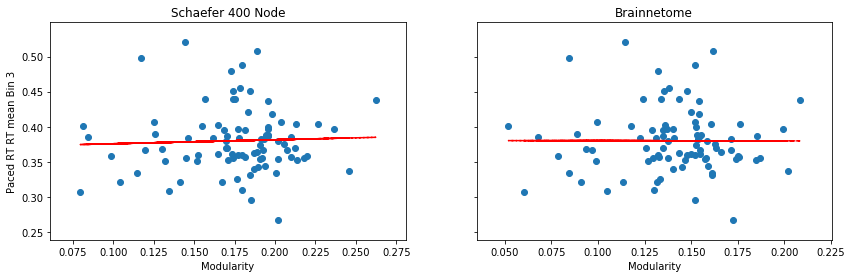

In [23]:
### Yeo 7 Network Modularity ###

dataX1 = modValsYeo7NetSchaefer[:,1] 
dataX2 = modValsYeo7NetBrainnetome[:,1] 
dataY = pRT93['RT_mean_Bin3']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Paced RT RT mean Bin 3')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.corrcoef(dataX1, dataY)[0,1])
print(np.corrcoef(dataX2, dataY)[0,1])

-0.025697971219031883
-0.009430106972562871


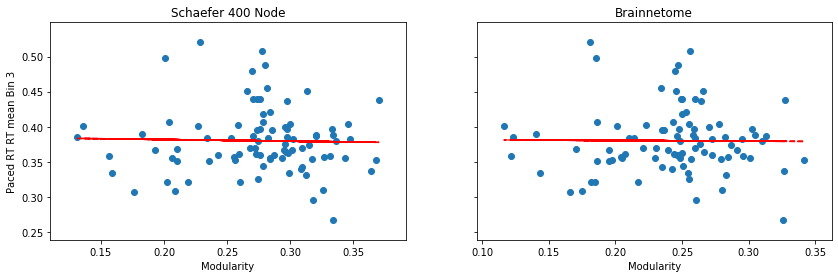

In [24]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = pRT93['RT_mean_Bin3']

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Paced RT RT mean Bin 3')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.corrcoef(dataX1, dataY)[0,1])
print(np.corrcoef(dataX2, dataY)[0,1])

# For metrics that correlated with Modularity, determine what is happening at the network-specific level, using participation coefficient

In [8]:
VisPCYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-Vis_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
MotPCYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-Mot_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
ElsePCYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-Else_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values

VisWMean_FCYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-VisW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
MotWMean_FCYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-MotW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
VisxMotMean_FCYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-VisxMot_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
VisxElseMean_FCYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-VisxElse_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
MotxElseMean_FCYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-MotxElse_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values



PCVis = VisPCYeo7NetSchaefer[:,1] 
PCMot = MotPCYeo7NetSchaefer[:,1] 
PCElse = ElsePCYeo7NetSchaefer[:,1] 

VisW = VisWMean_FCYeo7NetSchaefer[:,1] 
MotW = MotWMean_FCYeo7NetSchaefer[:,1] 
VisxMot = VisxMotMean_FCYeo7NetSchaefer[:,1] 
VisxElse = VisxElseMean_FCYeo7NetSchaefer[:,1] 
MotxElse = MotxElseMean_FCYeo7NetSchaefer[:,1] 

# rRT -- RT Std Dev

-0.092 0.462
-0.178 0.153
0.018 0.884


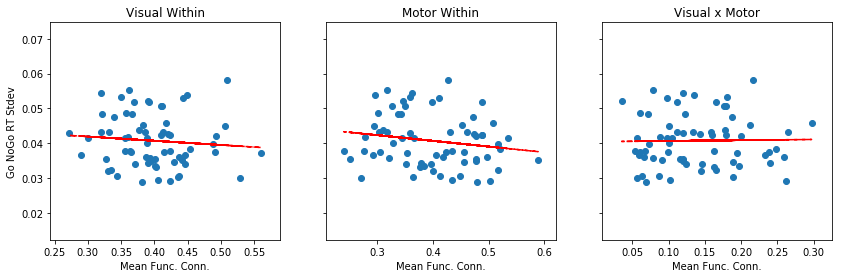

In [10]:
### Yeo 7 Network functional connectivity ###

dataX1 = VisW 
dataX2 = MotW
dataX3 = VisxMot
dataY = rRT66['rRT_std'] 

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,4))

ax1.set_title('Visual Within')
ax2.set_title('Motor Within')
ax3.set_title('Visual x Motor')
ax1.set_ylabel('Go NoGo RT Stdev')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Mean Func. Conn.')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Mean Func. Conn.')

ax3.scatter(dataX3, dataY)
ax3.set_xlabel('Mean Func. Conn.')



z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

z3 = np.polyfit(dataX3, dataY, 1)
p3 = np.poly1d(z3)
ax3.plot(dataX3,p3(dataX3),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))
print(np.round(np.corrcoef(dataX3, dataY)[0,1],3), np.round(stats.pearsonr(dataX3, dataY)[1],3))

# Paced RT -- Mean Acc all_BINs

-0.285 0.02
-0.05 0.689
-0.154 0.218


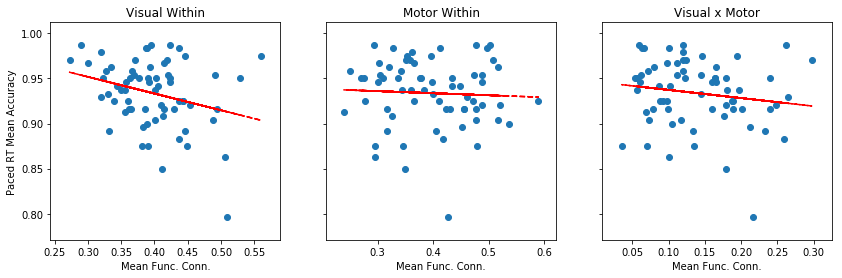

In [12]:
### Yeo 7 Network functional connectivity ###

dataX1 = VisW 
dataX2 = MotW
dataX3 = VisxMot
dataY = np.divide(pRT66['ACC_Bin1'] + pRT66['ACC_Bin2'] + pRT66['ACC_Bin3'] + pRT66['ACC_Bin4'],4)

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,4))

ax1.set_title('Visual Within')
ax2.set_title('Motor Within')
ax3.set_title('Visual x Motor')
ax1.set_ylabel('Paced RT Mean Accuracy')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Mean Func. Conn.')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Mean Func. Conn.')

ax3.scatter(dataX3, dataY)
ax3.set_xlabel('Mean Func. Conn.')



z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

z3 = np.polyfit(dataX3, dataY, 1)
p3 = np.poly1d(z3)
ax3.plot(dataX3,p3(dataX3),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))
print(np.round(np.corrcoef(dataX3, dataY)[0,1],3), np.round(stats.pearsonr(dataX3, dataY)[1],3))

# Participation Coefficient

-0.162 0.193
-0.336 0.006


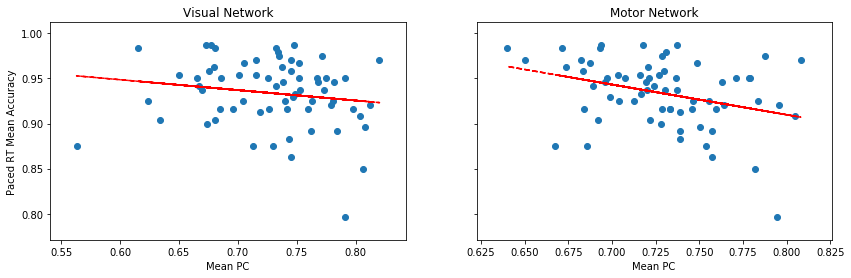

In [14]:
### Yeo 7 Network functional connectivity ###

dataX1 = PCVis 
dataX2 = PCMot
# dataX3 = VisxMot
dataY = np.divide(pRT66['ACC_Bin1'] + pRT66['ACC_Bin2'] + pRT66['ACC_Bin3'] + pRT66['ACC_Bin4'],4)

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Visual Network')
ax2.set_title('Motor Network')
# ax3.set_title('Visual x Motor')
ax1.set_ylabel('Paced RT Mean Accuracy')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Mean PC')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Mean PC')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))

-0.021 0.843
-0.012 0.911


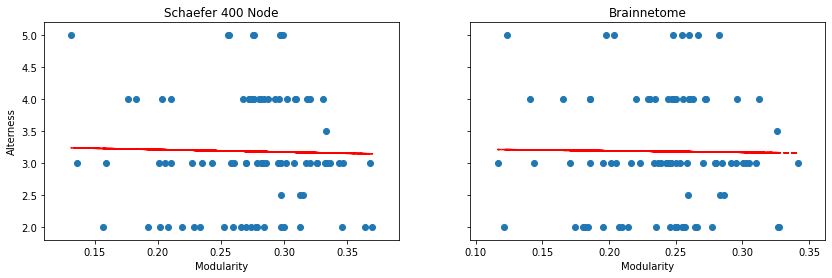

In [35]:
### Consensus Partition Modularity ###

dataX1 = modValsConsensusSchaefer[:,1] 
dataX2 = modValsConsensusBrainnetome[:,1] 
dataY = alert93

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))

ax1.set_title('Schaefer 400 Node')
ax2.set_title('Brainnetome')

ax1.scatter(dataX1, dataY)
ax1.set_xlabel('Modularity')
ax1.set_ylabel('Alterness')

ax2.scatter(dataX2, dataY)
ax2.set_xlabel('Modularity')

z1 = np.polyfit(dataX1, dataY, 1)
p1 = np.poly1d(z1)
ax1.plot(dataX1,p1(dataX1),"r--")

z2 = np.polyfit(dataX2, dataY, 1)
p2 = np.poly1d(z2)
ax2.plot(dataX2,p2(dataX2),"r--")

print(np.round(np.corrcoef(dataX1, dataY)[0,1],3), np.round(stats.pearsonr(dataX1, dataY)[1],3))
print(np.round(np.corrcoef(dataX2, dataY)[0,1],3), np.round(stats.pearsonr(dataX2, dataY)[1],3))